# WUM 2020: praca domowa nr 5 *\[klasteryzacja I\]*
## Jakub Kosterna

Zbiór punktów. To chyba nie powinno być trudne?

### Wczytanie i ogląd

In [212]:
import pandas as pd
df = pd.read_csv("clustering.csv", header = None)
df.sample(5)

,0,1
280,-88.744510,91.949625
310,20.321996,53.156279
392,-19.492936,-92.665472
284,88.847612,34.296765
320,-51.565694,-104.444308


In [213]:
df.shape

(400, 2)

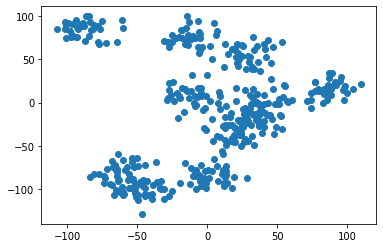

In [214]:
import matplotlib.pyplot as plt
plt.scatter(df[0], df[1])
plt.show()

No i cyk punkciki. Ile klastrów na oko? Zależy jak spojrzeć.

1. Z jednej strony widać trzy poziomy po... poziomach - te poniżej x-ka -50, od około 50 i te między -50 a 50
2. Z innej w każdym wierszu widzimy po dwa klastry, co daje nam w sumie 6
3. Patrząc jeszcze inaczej można dopatrzeć się czterech - jeden to te punkty poniżej - 50, jeden to skupisko na prawo od y = 60, trzeci to lewy górny róg, a czwarty to pozostałe - centrum średnio-górne

Niech algorytmy rozstrzygną!

### KMeans

Klasyczny algorytm centroidów zawsze spoko. Jak dobrze, że mamy *sklearn*!

In [215]:
from sklearn.cluster import KMeans

def kmeans_and_plot(X, n):
    kmeans = KMeans(n_clusters = n, random_state = 17)
    kmeans.fit(X)
    y_means = kmeans.predict(X)
    plt.scatter(X[0], X[1], c = y_means, s = 30, cmap = 'viridis')
    plt.title('K-means dla ' + str(n) + ' klastrów')
    plt.show()
    return y_means

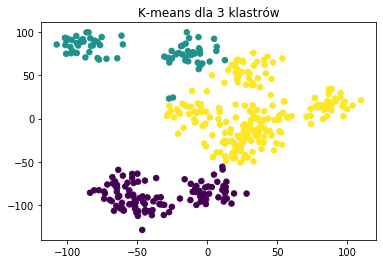

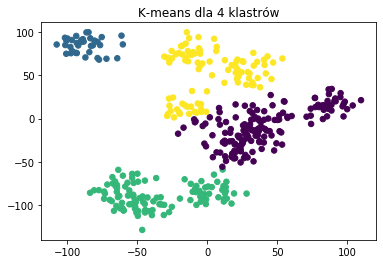

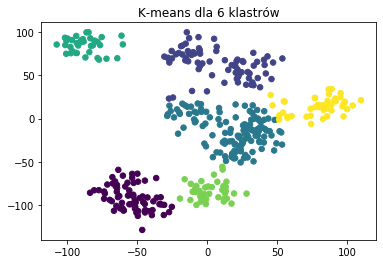

In [35]:
kmeans3clusters = kmeans_and_plot(df, 3)
kmeans4clusters = kmeans_and_plot(df, 4)
kmeans6clusters = kmeans_and_plot(df, 6)

O proszę! Nie wszystko poszło tak, jak się tego spodziewałem.

1. Dla 3 klastrów jako tako - choć osobiście do części górnej zaliczyłbym niemalże wszystkie punkty od y = 40 w górę
2. Dla 4 rzeczywiście fajny podział - nawet lepsza propozycja od mojej
3. Dla 6 prawie wszystko zgodnie z planem. Tylko to skupisko około punktu (50, 10) dziwi swoją żółcią.

Zobaczmy jeszcze jak poradzą sobie inne argumenty liczby klastrów.

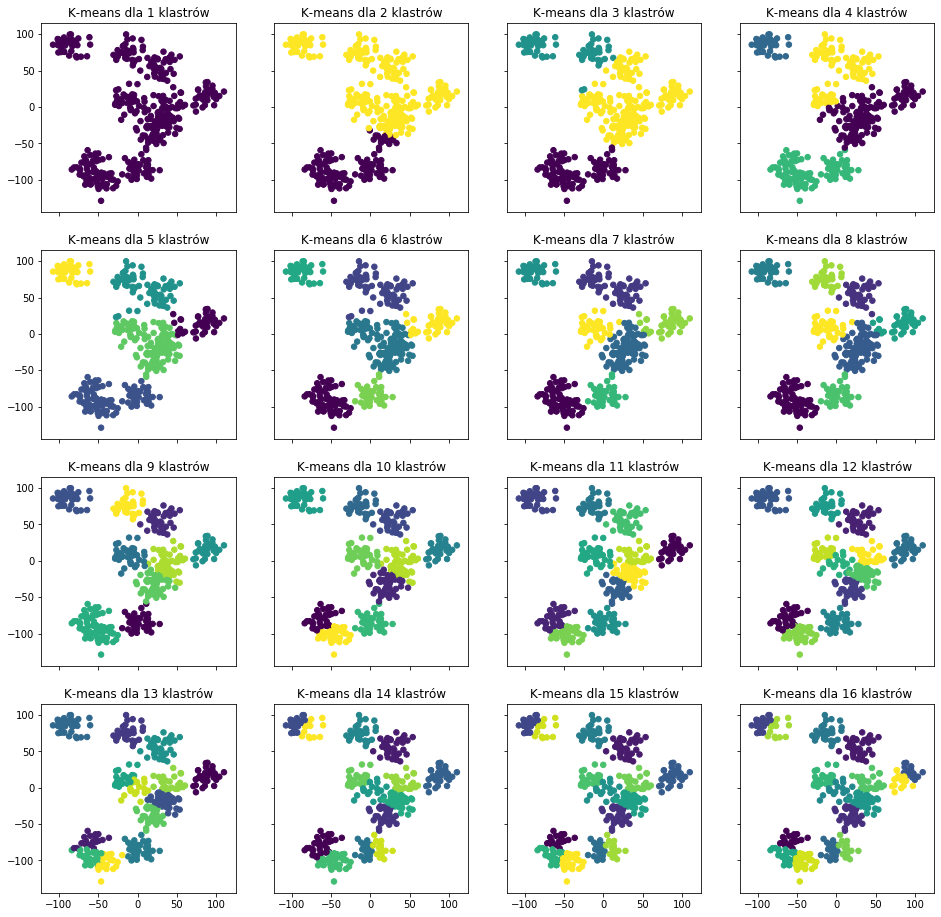

In [216]:
fig, axes = plt.subplots(4, 4, sharex=True, sharey=True, figsize=(16,16))
for i in range(1, 17):
    kmeans = KMeans(n_clusters = i, random_state = 17)
    kmeans.fit(df)
    y_means = kmeans.predict(df)
    axes[(i-1)//4][(i-1)%4].set_title('K-means dla ' + str(i) + ' klastrów')
    axes[(i-1)//4][(i-1)%4].scatter(df[0], df[1], c = y_means, s = 30, cmap = 'viridis')
    
plt.show()

W mojej subiektywnej ocenie, najmądrzejsze podziały zostały utworzone dla liczby klastrów 5, 6 i 8.

Warto było zrobić tą operację, bo olałbym ósemkę!

In [217]:
czyNajlepszyPodzialKMeansNaOko = [False] * 17
for i in (5, 6, 8):
    czyNajlepszyPodzialKMeansNaOko[i] = True

Co na to **metoda łokcia**?

In [218]:
def count_wcss_scores(X, k_max):
    #  WCSS = within-cluster sum of squares
    scores = []
    for k in range(1, k_max+1):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X)
        wcss = kmeans.score(X) * -1 # score returns -WCSSwhy
        scores.append(wcss)
    return scores

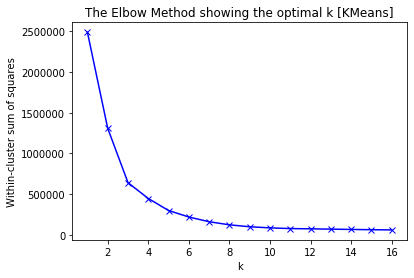

In [219]:
wcss_vec = count_wcss_scores(df, 16)
x_ticks = list(range(1, len(wcss_vec) + 1))
plt.plot(x_ticks, wcss_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Within-cluster sum of squares')
plt.title('The Elbow Method showing the optimal k [KMeans]')
plt.show()

Patrząc na momenty, w których krzywa się "załamuje", powiedziałbym 3, 5 i 6.

In [220]:
czyNajlepszyPodzialKMeansLokiec = [False] * 17
for i in (3, 5, 6):
    czyNajlepszyPodzialKMeansLokiec[i] = True

Zobaczmy jeszcze wynik **metody silhouette**.

In [221]:
def count_clustering_scores(X, cluster_num, model, score_fun):
    if isinstance(cluster_num, int):
        cluster_num_iter = [cluster_num]
    else:
        cluster_num_iter = cluster_num
        
    scores = []    
    for k in cluster_num_iter:
        model_instance = model(n_clusters=k)
        labels = model_instance.fit_predict(X)
        wcss = score_fun(X, labels)
        scores.append(wcss)
    
    if isinstance(cluster_num, int):
        return scores[0]
    else:
        return scores

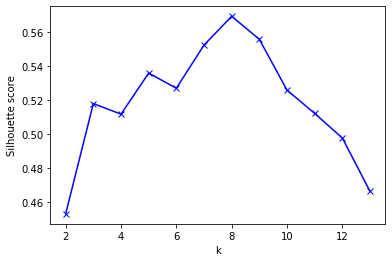

In [222]:
from sklearn.metrics import silhouette_score

cluster_num_seq = range(2, 14)
silhouette_vec = count_clustering_scores(df, cluster_num_seq, KMeans, silhouette_score)
plt.plot(cluster_num_seq, silhouette_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.show()

Faworyt to zdecydowanie 8(!), z wyróżnieniem dla 7 i 9.

In [223]:
czyNajlepszyPodzialKMeansSilhouette = [False] * 17
for i in range(7, 10):
    czyNajlepszyPodzialKMeansSilhouette[i] = True

Jaki podział jest więc najlepszy?

In [224]:
najlepszeMetrykiKMeans = pd.DataFrame([czyNajlepszyPodzialKMeansNaOko, czyNajlepszyPodzialKMeansLokiec,
              czyNajlepszyPodzialKMeansSilhouette]).sum().reset_index()
najlepszeMetrykiKMeans.columns = ["Liczba klastrów", "Obecności w TOP 3 najlepszych"]
najlepszeMetrykiKMeans[najlepszeMetrykiKMeans['Obecności w TOP 3 najlepszych'] > 1]

,Liczba klastrów,Obecności w TOP 3 najlepszych
5,5,2
6,6,2
8,8,2


Biorąc pod uwagę nasze trzy metryki, nie było żadnego podziału, który znalazł by się w najlepszej trójce owej metodyki wyboru najlepszej klasteryzacji. Za to aż 3 znalazły się w 2 z trzech z nich - oznacza to, że klastrowanie zarówne na 5, 6, jak i 8 podzbiorów jest w porządku, ale nie ma jednoznacznie najlepszego podziałowania - przynajmniej dzięki *KMeans*. Co na to inne metody?

### Klasteryzacja hierarchiczna

In [225]:
from sklearn.cluster import AgglomerativeClustering

def agglo_and_plot(X, n):
    model = AgglomerativeClustering(n_clusters = n, linkage = 'ward')
    y = model.fit_predict(X)
    plt.scatter(X[0], X[1], c=y, s=30, cmap='viridis')
    plt.title('Hierarchiczna dla ' + str(n) + ' klastrów')
    plt.show()
    return y

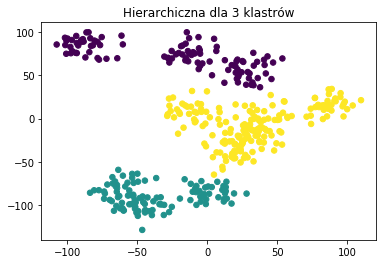

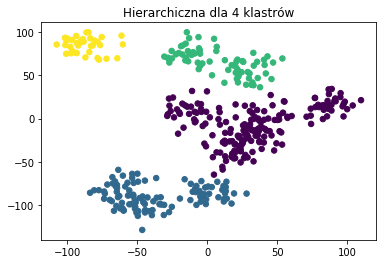

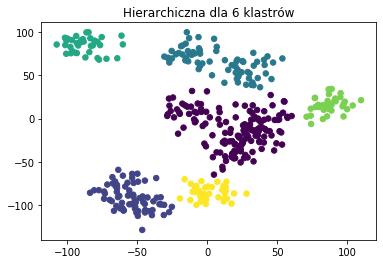

In [226]:
agglo3clusters = agglo_and_plot(df, 3)
agglo4clusters = agglo_and_plot(df, 4)
agglo6clusters = agglo_and_plot(df, 6)

Na pierwszy rzut oka **zdecydowanie lepsza metoda**! Wszystko zdaje się mieć sens i smak.

Wszystkie trzy metody odpowiadają intuicji i są sensowne. Najlepsza... ta dla 6 klastrów? Zobaczmy jeszcze inne.

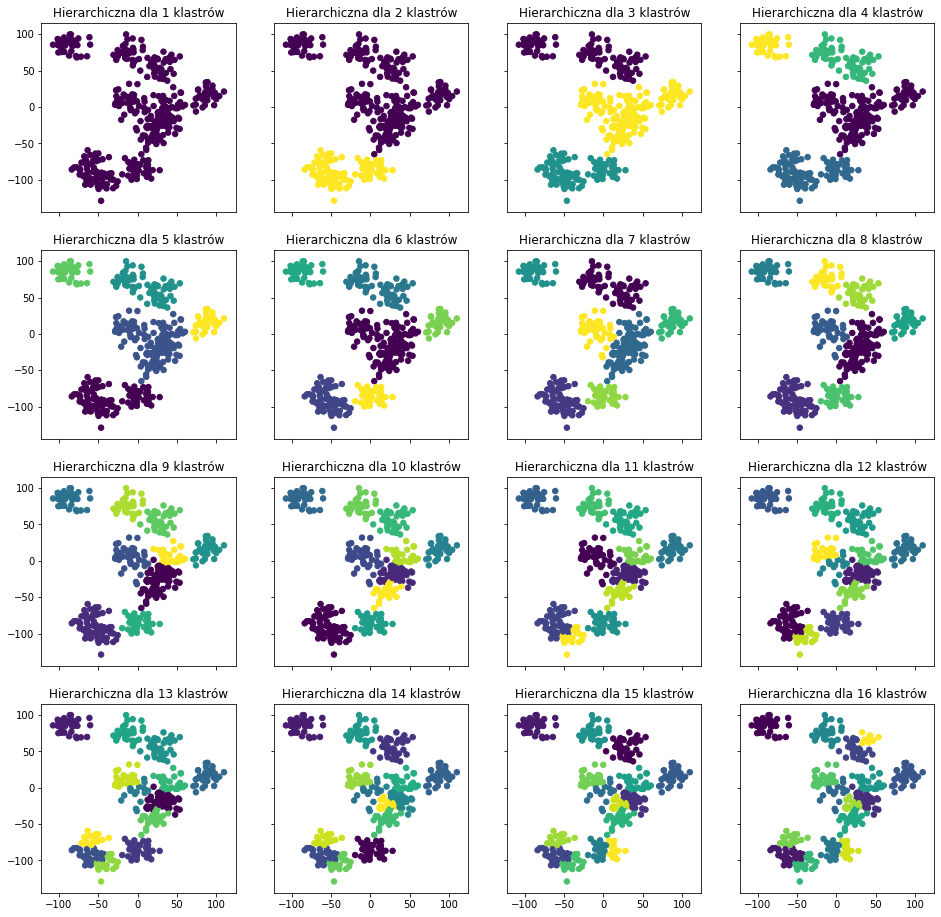

In [227]:
fig, axes = plt.subplots(4, 4, sharex=True, sharey=True, figsize=(16,16))
for i in range(1, 17):
    model = AgglomerativeClustering(i)
    model.fit(df)
    y = model.fit_predict(df)
    axes[(i-1)//4][(i-1)%4].set_title('Hierarchiczna dla ' + str(i) + ' klastrów')
    axes[(i-1)//4][(i-1)%4].scatter(df[0], df[1], c = y, s = 30, cmap = 'viridis')
    
plt.show()

Nie zmieniam zdania - najlepszy podział dla 3, 4 i 6 podzbiorów.

In [228]:
czyNajlepszyPodzialAggloNaOko = [False] * 17
for i in (3, 4, 6):
    czyNajlepszyPodzialAggloNaOko[i] = True

Obczajmy miarę łokcia.

Zobaczmy jeszcze hierarchię klastrów.

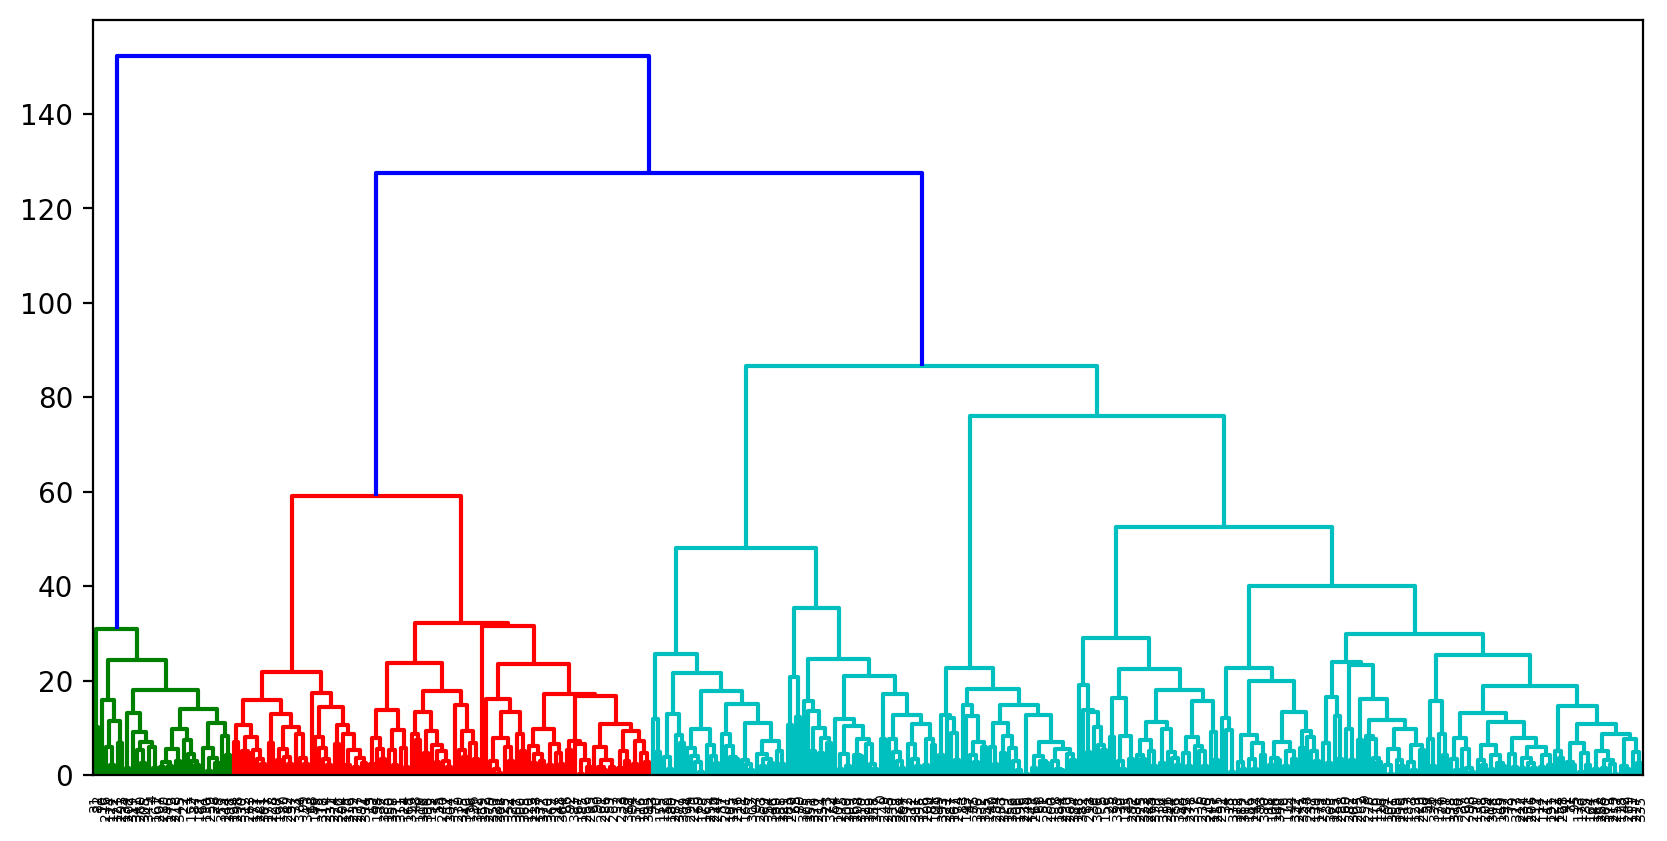

In [229]:
from scipy.cluster import hierarchy

Z = hierarchy.linkage(df, method='average')
plt.figure(figsize=(10, 5), dpi= 200, facecolor='w', edgecolor='k')
hierarchy.dendrogram(Z)
plt.show()

Owy podział jeszcze bardziej utwierdza w przekonaniu, że 3, 4 i 6 klastrów nie mają sobie równych.

In [230]:
czyNajlepszyPodzialAggloDrzewoHierarchii = [False] * 17
for i in (3, 4, 6):
    czyNajlepszyPodzialAggloDrzewoHierarchii[i] = True

Podsumowując, jednoznacznie dla *agglomerative clustering* najlepsze podziały to te na 3, 4 i 6 klastrów.

In [231]:
najlepszeMetrykiAgglo = pd.DataFrame([czyNajlepszyPodzialAggloNaOko,
              czyNajlepszyPodzialAggloDrzewoHierarchii]).sum().reset_index()
najlepszeMetrykiAgglo.columns = ["Liczba klastrów", "Obecności w TOP 3 najlepszych"]
najlepszeMetrykiAgglo[najlepszeMetrykiAgglo["Obecności w TOP 3 najlepszych"] > 1]

,Liczba klastrów,Obecności w TOP 3 najlepszych
3,3,2
4,4,2
6,6,2


### Klasteryzacja deglomeracyjna

... tak bardziej dla kultury.

Jestem niemalże pewien, że nie wyjdzie nic ciekawego - no ale ciekawe.

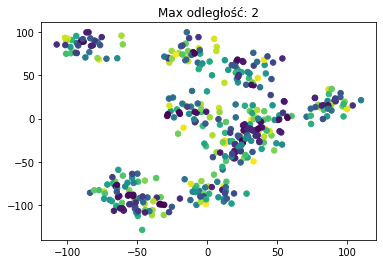

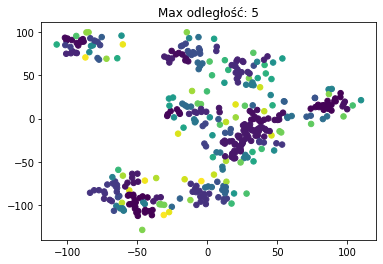

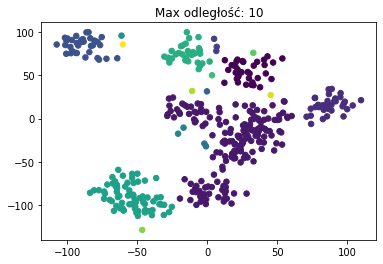

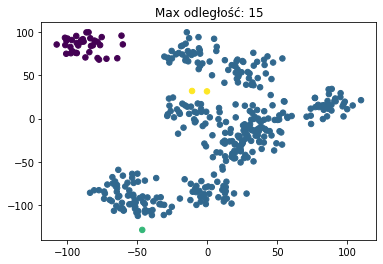

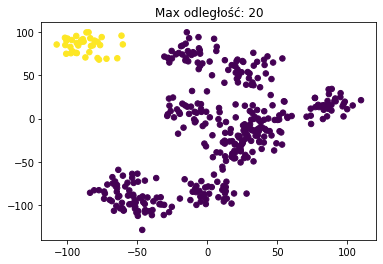

In [232]:
for maxOdleglosc in (2, 5, 10, 15, 20):
    model = AgglomerativeClustering(n_clusters=None, linkage='single', distance_threshold=maxOdleglosc)
    y = model.fit_predict(df)
    plt.scatter(df[0], df[1], c=y, s=30, cmap='viridis')
    plt.title('Max odległość: ' + str(maxOdleglosc))
    plt.show()

Zaiste nie miało to sensu. Dalej!

### Podsumowanie

Okey, rozpatrzyliśmy dwie mądre metody podziału naszego zbioru na klastry.

Do oceny najlepszego podzialu *KMeans* użyłem trzech metryk, do oceny *klasteryzacji hierarchicznej* - dwóch metryk. Na każdą z tych pięciu metryk wybrałem 3 najlepsze podziały. Zsumujmy częstości tych *n_clusters* w owych najlepszych trójkach, żeby ostatecznie roztrzygnąć, ile właściwie mamy podziałów w ramce.

In [233]:
najlepszeMetryki = najlepszeMetrykiKMeans['Obecności w TOP 3 najlepszych'] + najlepszeMetrykiAgglo['Obecności w TOP 3 najlepszych']
najlepszeMetryki = najlepszeMetryki.reset_index()
najlepszeMetryki = najlepszeMetryki[najlepszeMetryki['Obecności w TOP 3 najlepszych'] > 0].drop('index', axis = 1)
najlepszeMetryki

,Obecności w TOP 3 najlepszych
3,3
4,2
5,2
6,4
7,1
8,2
9,1


I wszystko jasne!

Na 5 metryk, **każde z klastrowań od 3 do 9 grup zyskało uznanie w przynajmniej jednej grupie**.

Wyróżnić należy podział na 3 klastry, który w aż 3 z 5 klastrach dostał uznanie, ale **prawdziwym mistrzem zostaje klasteryzacja na 6 podgrup** - tylko w jednej metryce (metodzie *silhouette*) nie zyskała ona uznania.

#### Wiwat 6 klastrów!!!

Żeby uczcić owe zwycięstwo, zobaczmy jeszcze raz i porównajmy podział dla trzech metod - w miarę mądrych *KMeans* i *hierarchicznej*, a także nieco prześmiewczo - dla *deglomeracyjnej*.

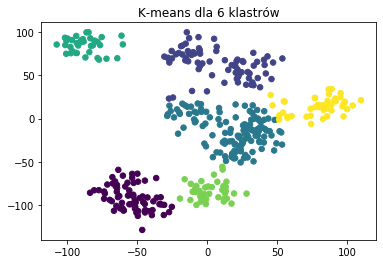

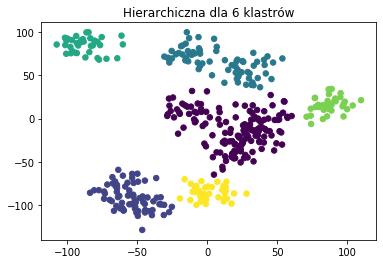

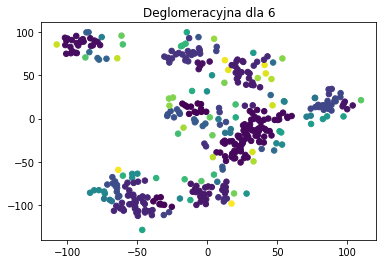

In [234]:
kmeans6clusters = kmeans_and_plot(df, 6)
agglo6clusters = agglo_and_plot(df, 6)

model = AgglomerativeClustering(n_clusters=None, linkage='single', distance_threshold=6)
y = model.fit_predict(df)
plt.scatter(df[0], df[1], c=y, s=30, cmap='viridis')
plt.title('Deglomeracyjna dla 6')
plt.show()

Podsumowując, dla zbiorów takich jak ta: *k-Means* jest git, ale nieidealne, *hierarchiczna* zdaje egzamin na 6, a *deglomeracyjną* można wyrzucić do kosza.